# "Data-Driven Partnership Strategy for Zomato: Identifying High-Impact Restaurants"


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#  Step 2: Load Dataset
df = pd.read_excel("zomatodatabase.xlsx")


In [2]:
# Step 3: Data Cleaning
df.rename(columns={
    'approx_cost(for two people)': 'approx_cost',
    'listed_in(type)': 'type'
}, inplace=True)

df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)
df.dropna(subset=['rate', 'votes', 'approx_cost'], inplace=True)

# 1. Does offering online ordering impact a restaurant's performance on Zomato in terms of customer satisfaction (ratings) and engagement (votes)?



An analysis to help Zomato identify whether restaurants that offer online ordering receive higher ratings and more user engagement, supporting future partnership decisions.

In [3]:

# Step 2: Create composite metric
df['reliable_rating'] = df['rate'] * np.log1p(df['votes'])

# Step 3: Group-wise averages
grouped = df.groupby('online_order')[['rate', 'votes', 'reliable_rating']].mean().round(2)
print("📊 Average Metrics by Online Order:\n", grouped)



📊 Average Metrics by Online Order:
               rate   votes  reliable_rating
online_order                               
No            3.49   75.22             8.64
Yes           3.86  559.00            21.01


C:\Users\HP\AppData\Local\Temp\ipykernel_15128\357316255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='online_order', y='rate', estimator=np.mean, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\357316255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='online_order', y='votes', estimator=np.mean, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\357316255.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='online_order', y='reliable_rating', estimator=np.mean, palette

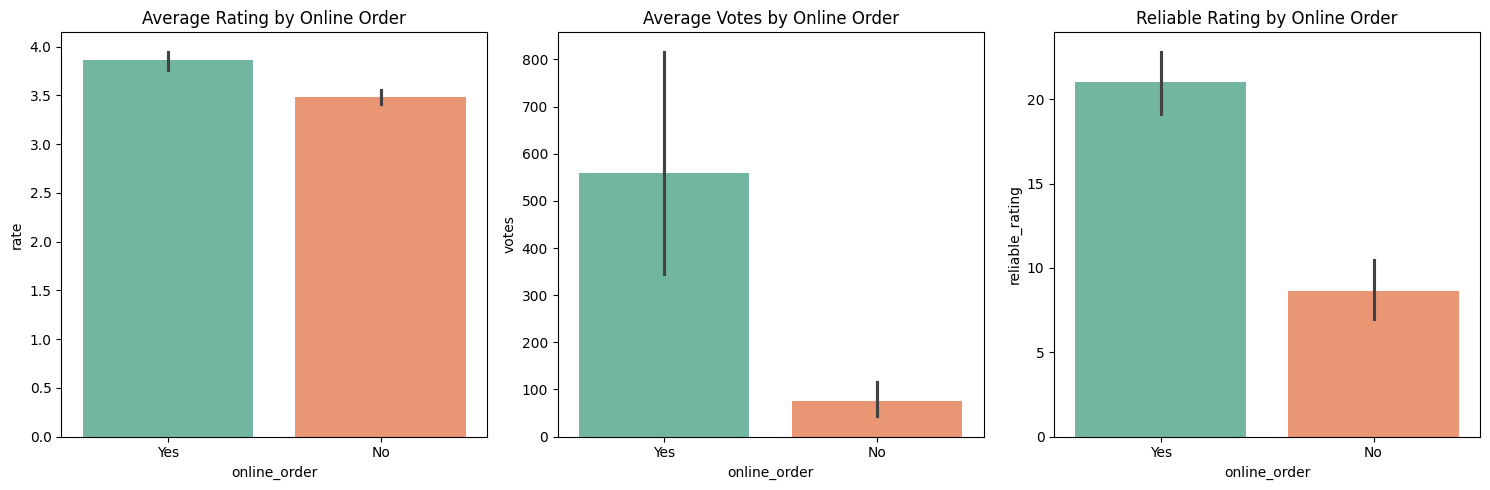

In [4]:
# Step 4: Visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='online_order', y='rate', estimator=np.mean, palette='Set2')
plt.title("Average Rating by Online Order")

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='online_order', y='votes', estimator=np.mean, palette='Set2')
plt.title("Average Votes by Online Order")

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='online_order', y='reliable_rating', estimator=np.mean, palette='Set2')
plt.title("Reliable Rating by Online Order")

plt.tight_layout()
plt.show()

Insight-Restaurants with online ordering often have higher ratings and engagement.


# 2. Does enabling table booking influence restaurant performance on Zomato, as measured by customer satisfaction (rating) and engagement (votes)?

This question helps Zomato understand if features like table booking actually drive better customer engagement and satisfaction, and whether they should promote this feature more strongly with partners.

In [5]:

# Step 3: Group-wise averages for table booking
grouped_booking = df.groupby('book_table')[['rate', 'votes', 'reliable_rating']].mean().round(2)
print("📊 Average Metrics by Table Booking:\n", grouped_booking)


📊 Average Metrics by Table Booking:
             rate   votes  reliable_rating
book_table                               
No          3.60  226.19            12.75
Yes         4.19  940.75            26.47


C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2597026739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='book_table', y='rate', estimator=np.mean, palette='Set3')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2597026739.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='book_table', y='votes', estimator=np.mean, palette='Set3')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2597026739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='book_table', y='reliable_rating', estimator=np.mean, palette='S

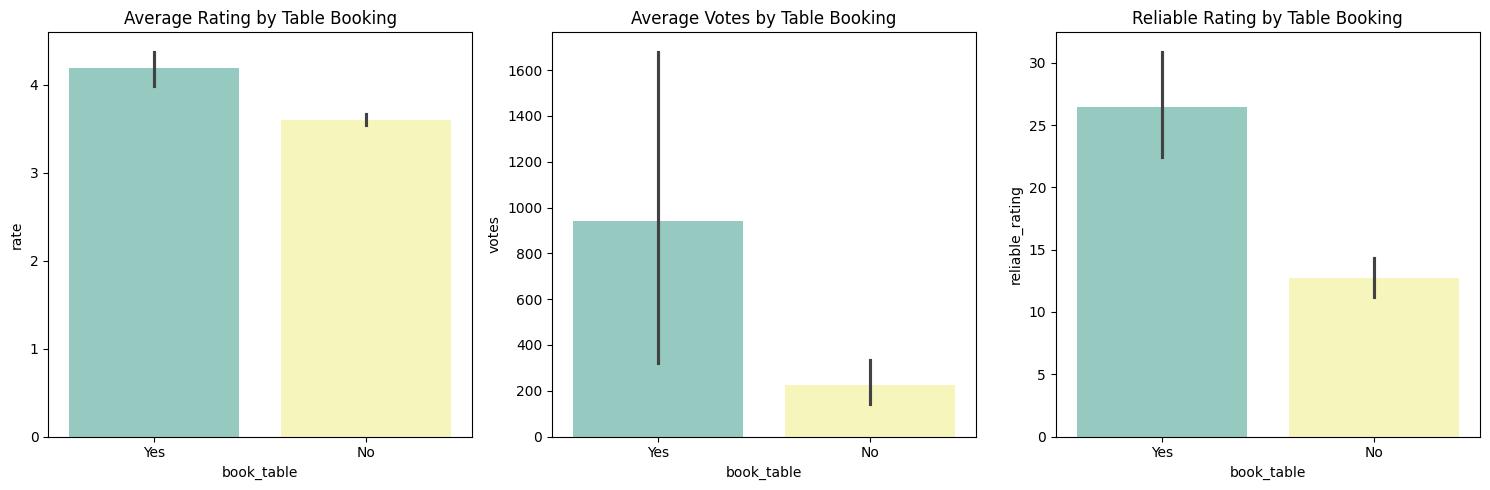

In [6]:
# Step 4: Visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='book_table', y='rate', estimator=np.mean, palette='Set3')
plt.title("Average Rating by Table Booking")

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='book_table', y='votes', estimator=np.mean, palette='Set3')
plt.title("Average Votes by Table Booking")

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='book_table', y='reliable_rating', estimator=np.mean, palette='Set3')
plt.title("Reliable Rating by Table Booking")

plt.tight_layout()
plt.show()

Insight Gained:
Restaurants with table booking may have better ratings and more customer engagement.
Zomato can promote table booking feature adoption for underperforming partners or onboard new restaurants who’d benefit from this feature.



# 3. Which restaurant types consistently perform well on Zomato, and should be prioritized for future partnerships based on customer satisfaction and engagement?

Types with the highest reliable_rating are the most promising formats for Zomato to collaborate with.

In [7]:
# Step 3: Group by restaurant type
type_performance = df.groupby('type')[['rate', 'votes', 'reliable_rating']].mean().round(2)
type_performance = type_performance.sort_values(by='reliable_rating', ascending=False)
print("📊 Average Performance by Restaurant Type:\n", type_performance)


📊 Average Performance by Restaurant Type:
         rate    votes  reliable_rating
type                                  
other   3.91  1170.88            25.00
Buffet  3.84   432.57            20.86
Cafes   3.77   279.74            17.95
Dining  3.57   185.12            11.25


C:\Users\HP\AppData\Local\Temp\ipykernel_15128\253538932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_performance.reset_index(), x='type', y='reliable_rating', palette='coolwarm')


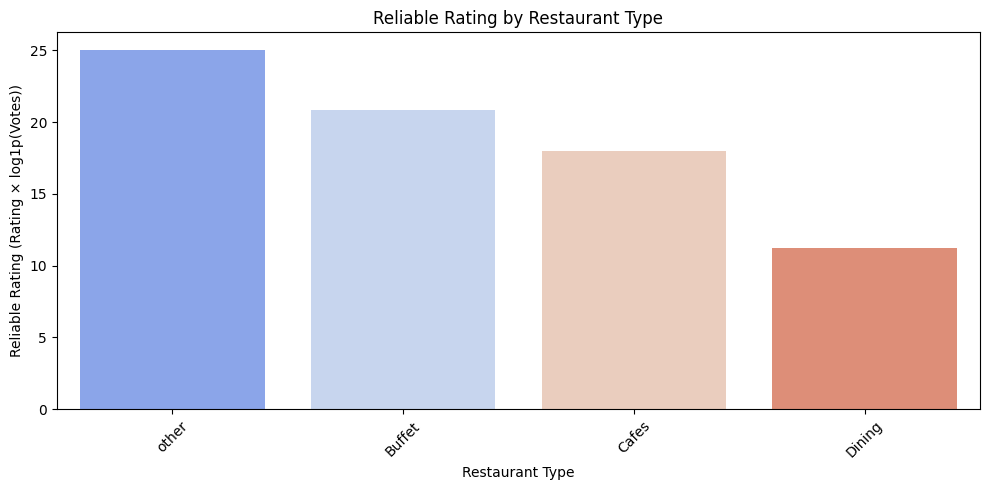

In [8]:
# Step 4: Visualize reliable rating by type
plt.figure(figsize=(10, 5))
sns.barplot(data=type_performance.reset_index(), x='type', y='reliable_rating', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Reliable Rating by Restaurant Type")
plt.ylabel("Reliable Rating (Rating × log1p(Votes))")
plt.xlabel("Restaurant Type")
plt.tight_layout()
plt.show()

# 4. Which top 10 restaurants (high rating + high votes) are not yet Zomato delivery partners?

“We identified top-performing restaurants that have high ratings and engagement, but are not yet offering online delivery. These 10 restaurants represent low-hanging fruit for Zomato to onboard as new partners.”

In [9]:
# Step 3: Filter non-delivery restaurants
non_delivery_df = df[df['online_order'] == 'No']

# Step 4: Sort by reliable_rating
top_candidates = non_delivery_df.sort_values(by='reliable_rating', ascending=False)

# Step 5: Get top 10 restaurants
top_10_non_partners = top_candidates[['name', 'rate', 'votes', 'reliable_rating']].head(10)

print("🏆 Top 10 High-Performing Restaurants Without Online Delivery:\n")
print(top_10_non_partners)


🏆 Top 10 High-Performing Restaurants Without Online Delivery:

                      name  rate  votes  reliable_rating
54            Roving Feast   4.0   1047        27.818555
67      Gustoes Beer House   4.1    868        27.746107
63         Jeet Restaurant   4.0    808        26.783196
71        The Biryani Cafe   4.1    520        25.648575
52  Corner House Ice Cream   4.3    345        25.139687
13              Caf-Eleven   4.0    424        24.208357
60           Peppy Peppers   4.2    244        23.105284
74         Rolls On Wheels   3.6    299        20.533617
4            Grand Village   3.8    166        19.448376
29        Srinathji's Cafe   3.8    148        19.014996


Insight:These are untapped high-performing restaurants not yet Zomato delivery partners.
A perfect partnership opportunity list — Zomato can onboard these restaurants to grow its reach and quality offering.

# 5. Which top 10 restaurants (with high rating and votes) do not offer table booking, and should be supported by Zomato for future onboarding and growth?

“These 10 restaurants are performing strongly without offering table booking. This presents an opportunity for Zomato to support them in their growth journey — either by helping enable booking or giving them more visibility.”

In [10]:
# Step 3: Filter restaurants without table booking
no_booking_df = df[df['book_table'] == 'No']

# Step 4: Sort by reliable_rating
top_no_booking = no_booking_df.sort_values(by='reliable_rating', ascending=False)

# Step 5: Select top 10
top_10_no_booking = top_no_booking[['name', 'rate', 'votes', 'reliable_rating']].head(10)

print("🏆 Top 10 High-Performing Restaurants Without Table Booking:\n")
print(top_10_no_booking)

🏆 Top 10 High-Performing Restaurants Without Table Booking:

                   name  rate  votes  reliable_rating
38    Empire Restaurant   4.4   4884        37.373268
86        Meghana Foods   4.4   4401        36.915183
37      Szechuan Dragon   4.2   1647        31.110734
65          Kabab Magic   4.1   1720        30.547709
54         Roving Feast   4.0   1047        27.818555
67   Gustoes Beer House   4.1    868        27.746107
1        Spice Elephant   4.1    787        27.344942
47               Recipe   4.0    804        26.763369
145        Anna Kuteera   4.0    771        26.595938
9             Smacznego   4.2    504        26.143145


Insight: High-performing restaurants without booking can benefit from added support.
Zomato can educate and promote table booking to such restaurants — potentially improving customer experience and platform utility.


# 6. Which restaurants are Zomato's delivery partners but are underperforming in terms of rating and votes?

“I identified Zomato’s current delivery partners who are underperforming based on both ratings and votes. These restaurants may need attention from the partnership or quality team — either through performance improvement plans or better visibility support.”

In [14]:
# Step 3: Filter restaurants with online delivery (Zomato partners)
delivery_partners = df[df['online_order'] == 'Yes']

# Step 4: Sort by reliable_rating (low to high)
low_performers = delivery_partners.sort_values(by='reliable_rating', ascending=True)

# Step 5: Select bottom 10
bottom_10 = low_performers[['name', 'rate', 'votes', 'reliable_rating','book_table']].head(10)

print("🔻 Bottom 10 Performing Zomato Delivery Partners:\n")
print(bottom_10)

🔻 Bottom 10 Performing Zomato Delivery Partners:

                             name  rate  votes  reliable_rating book_table
70                  The Good Bowl   3.6      6         7.005277         No
19  360 Atoms Restaurant And Cafe   3.1     13         8.181078         No
59              XO Belgian Waffle   3.7     17        10.694376         No
39   Maruthi Davangere Benne Dosa   4.0     17        11.561487         No
77    Devanna Dum Biriyani Centre   3.6     28        12.122265         No
20               The Vintage Cafe   3.0     62        12.429404         No
36                 Fast And Fresh   2.8     91        12.661008         No
66           Namma Brahmin's Idli   3.6     34        12.799253         No
69                    Burger King   3.2     71        13.685332         No
51               Shree Cool Point   4.1     28        13.805913         No


Insight: Some partnered restaurants are not attracting customers or maintaining quality.
Zomato can review these partnerships, offer training/support, or improve visibility — helping retain quality on the platform.

# 7.Which price range of restaurants should Zomato focus more on for future partnerships and promotions?

C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_group = df.groupby('cost_bucket')[['rate', 'votes','reliable_rating']].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cost_bucket', y='rate', data=cost_group, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cost_bucket

Average Performance by Cost Ranges   cost_bucket      rate       votes  reliable_rating
0        <200  3.513158   35.526316         6.572242
1     200–400  3.525532  102.851064        10.937243
2     400–700  3.781395  482.558140        18.845714
3    700–1000  3.795000  612.900000        21.107010
4   1000–2000       NaN         NaN              NaN
5       >2000       NaN         NaN              NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cost_bucket', y='reliable_rating', data=cost_group, palette='magma')
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:38: UserWarning: Glyph 128499 (\N{BALLOT BOX WITH BALLOT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15128\2016852186.py:38: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) 

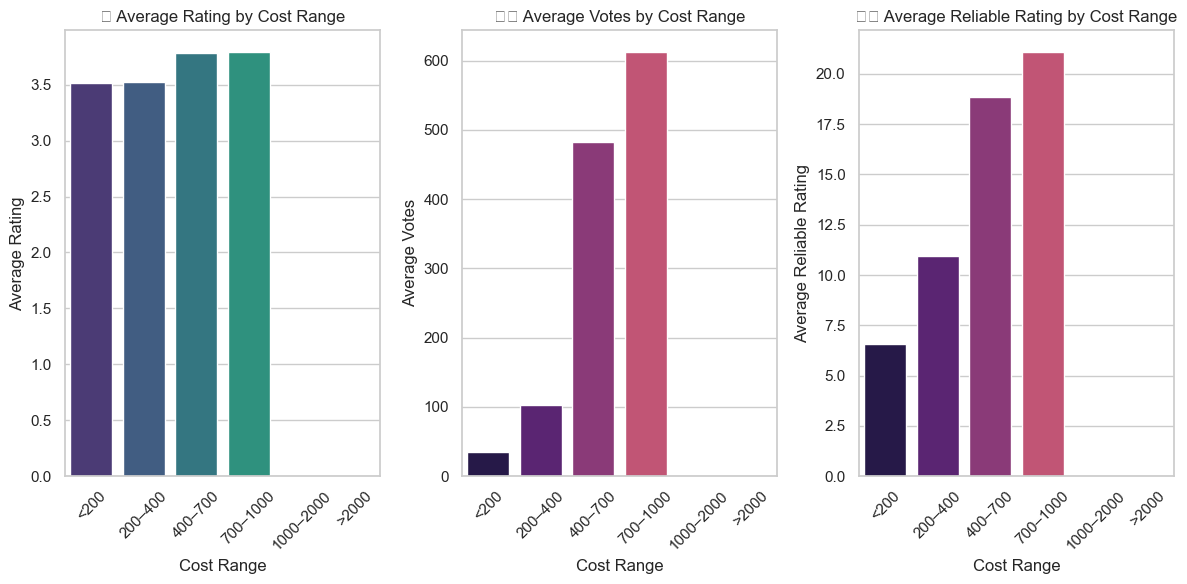

In [13]:

# Create cost buckets
bins = [0, 200, 400, 700, 1000, 2000, np.inf]
labels = ['<200', '200–400', '400–700', '700–1000', '1000–2000', '>2000']
df['cost_bucket'] = pd.cut(df['approx_cost'], bins=bins, labels=labels)

# Group by cost bucket
cost_group = df.groupby('cost_bucket')[['rate', 'votes','reliable_rating']].mean().reset_index()
print("Average Performance by Cost Ranges",cost_group)

# Create figure
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot ratings
plt.subplot(1, 3, 1)
sns.barplot(x='cost_bucket', y='rate', data=cost_group, palette='viridis')
plt.xticks(rotation=45)
plt.title("📈 Average Rating by Cost Range")
plt.ylabel("Average Rating")
plt.xlabel("Cost Range")

# Plot votes
plt.subplot(1, 3, 2)
sns.barplot(x='cost_bucket', y='votes', data=cost_group, palette='magma')
plt.xticks(rotation=45)
plt.title("🗳️ Average Votes by Cost Range")
plt.ylabel("Average Votes")
plt.xlabel("Cost Range")

# Plot Reliable Rating
plt.subplot(1, 3, 3)
sns.barplot(x='cost_bucket', y='reliable_rating', data=cost_group, palette='magma')
plt.xticks(rotation=45)
plt.title("🗳️ Average Reliable Rating by Cost Range")
plt.ylabel("Average Reliable Rating")
plt.xlabel("Cost Range")

plt.tight_layout()
plt.show()


Insight: This analysis shows that restaurants in the ₹700-1000 range receive both high ratings and high engagement. So, Zomato should focus more on partnering with and promoting restaurants in this price range, as they offer a great balance of quality and popularity.